In [467]:
import warnings
warnings.filterwarnings('ignore')

In [468]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [469]:
%matplotlib inline

In [470]:
sns.set()

In [471]:
pd.set_option('display.max_columns',100)

# Data Import

In [472]:
prices = pd.read_csv('CarPrice_Assignment.csv')

In [473]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [474]:
prices.shape

(205, 26)

In [475]:
prices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


data set has 205 rows, 26 columns, with 11 columns categorical columns and 14 continuous columns. There are no null values present in the data set as seen from above

### Settings car_ID as index

In [476]:
prices.set_index('car_ID',inplace = True)

In [477]:
prices.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Cleaning

## Null value check

In [478]:
prices.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no null values present in the dataframe as seen from the above.

## Duplicate value check

In [479]:
prices.duplicated().sum()

0

## Converting symboling from continuous to categorical

In [480]:
prices.symboling = prices.symboling.astype('category')

## Converting object columns into category

In [481]:
object_list = prices.select_dtypes(include = 'object').columns

In [482]:
prices[object_list] = prices[object_list].astype('category')

In [483]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null category
CarName             205 non-null category
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null category
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null category
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-n

## New variable creation

### Company Name is extracted from CarName

In [484]:
prices.CarName.unique()

[alfa-romero giulia, alfa-romero stelvio, alfa-romero Quadrifoglio, audi 100 ls, audi 100ls, ..., volvo 244dl, volvo 245, volvo 264gl, volvo diesel, volvo 246]
Length: 147
Categories (147, object): [alfa-romero giulia, alfa-romero stelvio, alfa-romero Quadrifoglio, audi 100 ls, ..., volvo 245, volvo 264gl, volvo diesel, volvo 246]

We can see that CarName is actually comprised on two words seperated by a space with the first word being the Company name. We can create a new variable called Company and extract it from CarName column

In [485]:
prices['Company'] = prices.CarName.apply(lambda x: x.split(' ')[0])

In [486]:
prices.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We can see that some of the company names are misspelled or case different like `maxda`,`Nissan`,`porcshce`,`toyouta`,`vokswagen`,`vw`. Hence these are to be corrected.

In [487]:
prices.loc[prices.Company == 'maxda','Company'] = 'mazda'
prices.loc[prices.Company == 'Nissan','Company'] = 'nissan'
prices.loc[prices.Company == 'porcshce','Company'] = 'porsche'
prices.loc[prices.Company == 'toyouta','Company'] = 'toyota'
prices.loc[prices.Company == 'vokswagen','Company'] = 'volkswagen'
prices.loc[prices.Company == 'vw','Company'] = 'volkswagen'

In [488]:
prices.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [489]:
prices.Company = prices.Company.astype('category')

## Dropping columns

`CarName` column is not necessary hence the column is dropped

In [490]:
prices.drop('CarName',axis = 1,inplace = True)

In [491]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null category
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null category
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null category
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null

## EDA

In [492]:
# cat_cols has list of all columns of type category
cat_cols = prices.select_dtypes(include = 'category').columns.tolist()

In [493]:
prices[cat_cols].describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company
count,205,205,205,205,205,205,205,205,205,205,205
unique,6,2,2,2,5,3,2,7,7,8,22
top,0,gas,std,four,sedan,fwd,front,ohc,four,mpfi,toyota
freq,67,185,168,115,96,120,202,148,159,94,32


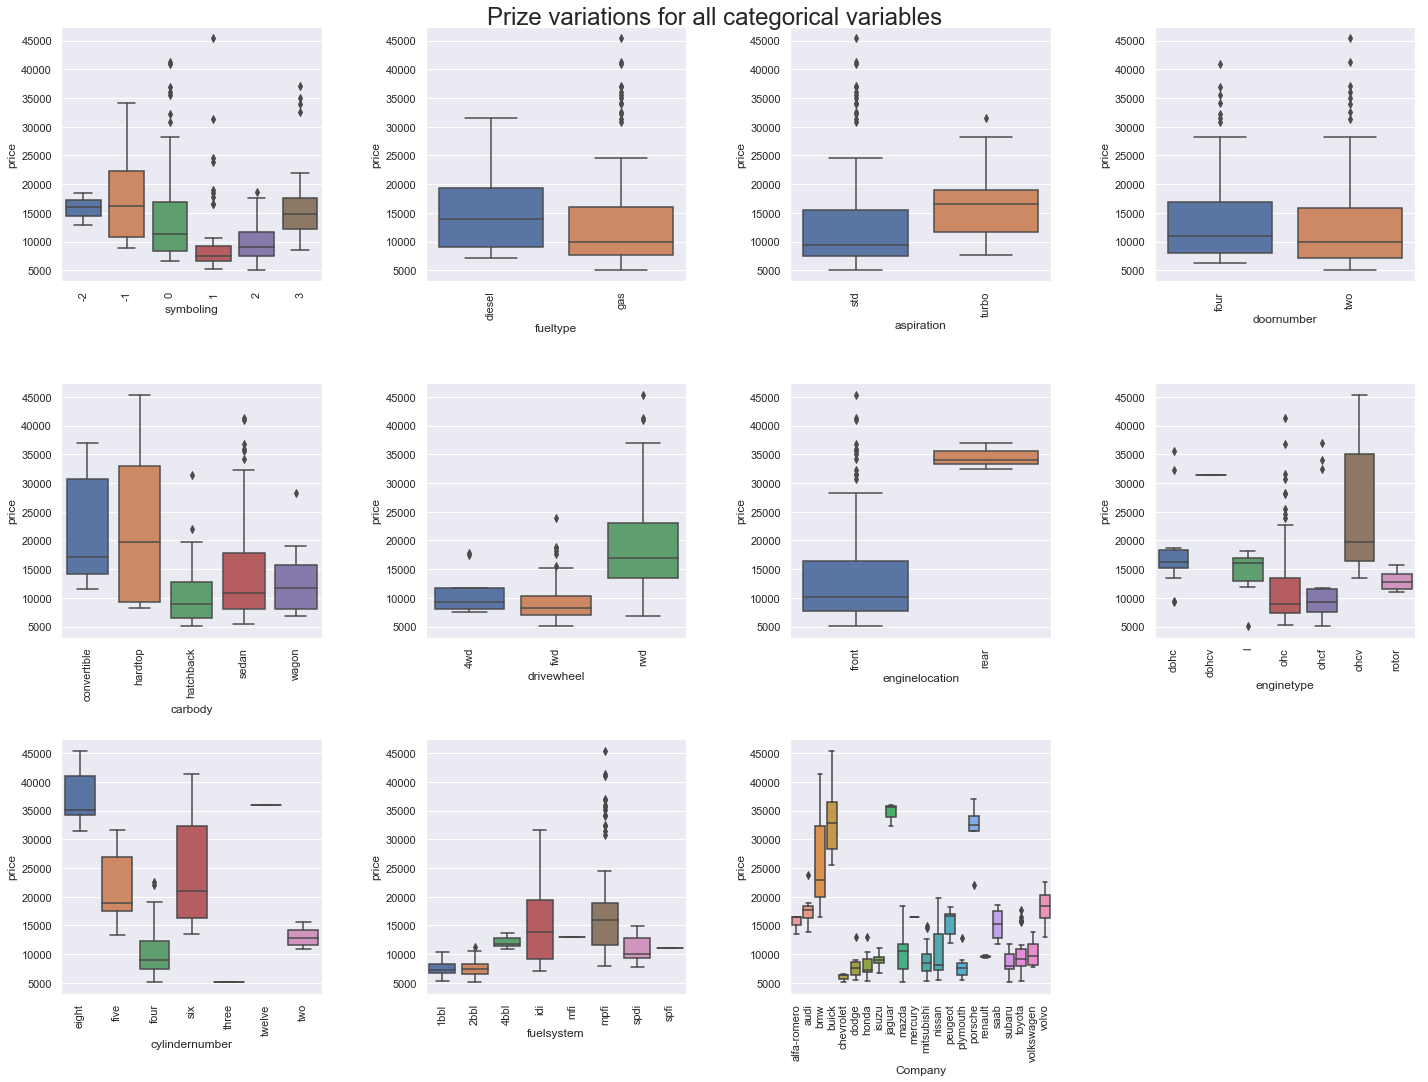

In [494]:
i= 1
total = len(cat_cols)
plt.figure(figsize=(20,15))
plt.suptitle('Prize variations for all categorical variables',va = 'bottom',fontsize = 24)
#fig,axes = plt.subplots(nrows = 3,ncols = 4)
for feature in cat_cols:
    plt.subplot(3,4,i)
    sns.boxplot(x = feature,y='price',data = prices)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.subplots_adjust(wspace = 0.4,hspace = 0.4)
plt.show()

From the above figure we can see that price has a strong correlation with all most all the variable except for `fueltype` and `doornumber`

In [495]:
#cont_cols has list of all columns which are continuous variables except for price
cont_cols = prices.select_dtypes(exclude = 'category').columns.tolist()
cont_cols.pop(cont_cols.index('price'))

'price'

In [496]:
print(len(cont_cols))

13


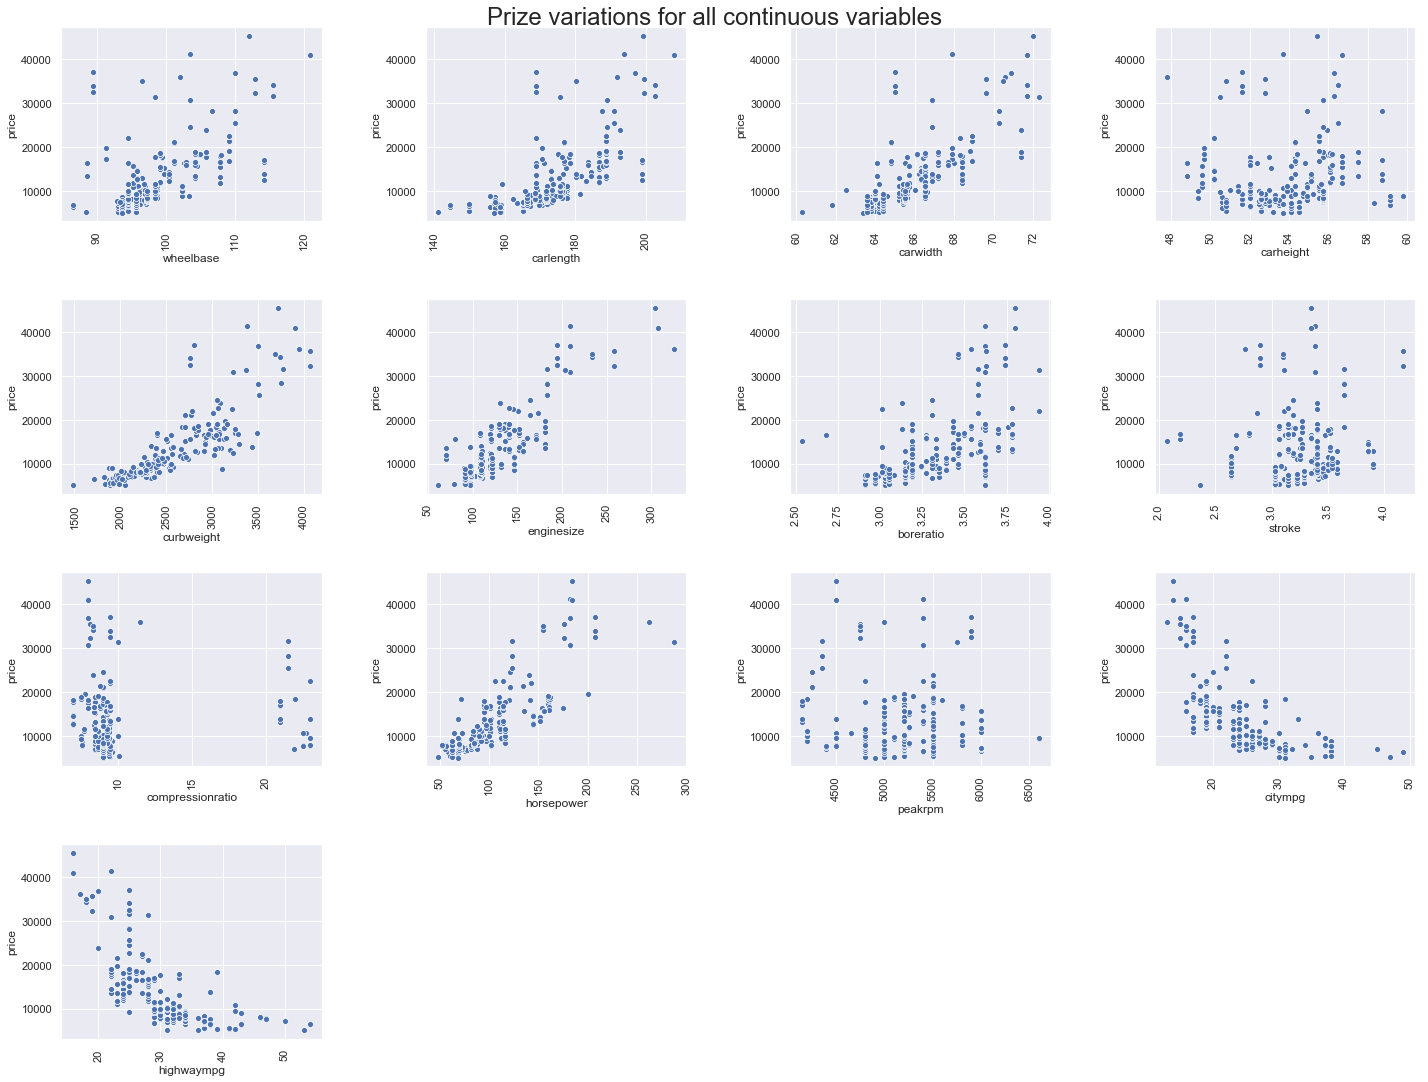

In [497]:
i= 1
total = len(cont_cols)
plt.figure(figsize=(20,15))
plt.suptitle('Prize variations for all continuous variables',va = 'bottom',fontsize = 24)
#fig,axes = plt.subplots(nrows = 3,ncols = 4)
for feature in cont_cols:
    plt.subplot(4,4,i)
    sns.scatterplot(x = feature,y='price',data = prices)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.subplots_adjust(wspace = 0.4,hspace = 0.4)
plt.show()

We can see that most of the continuous variables are strongly correlated with the price of the car except for `stroke`, `peakrpm` and `compressionratio`. 

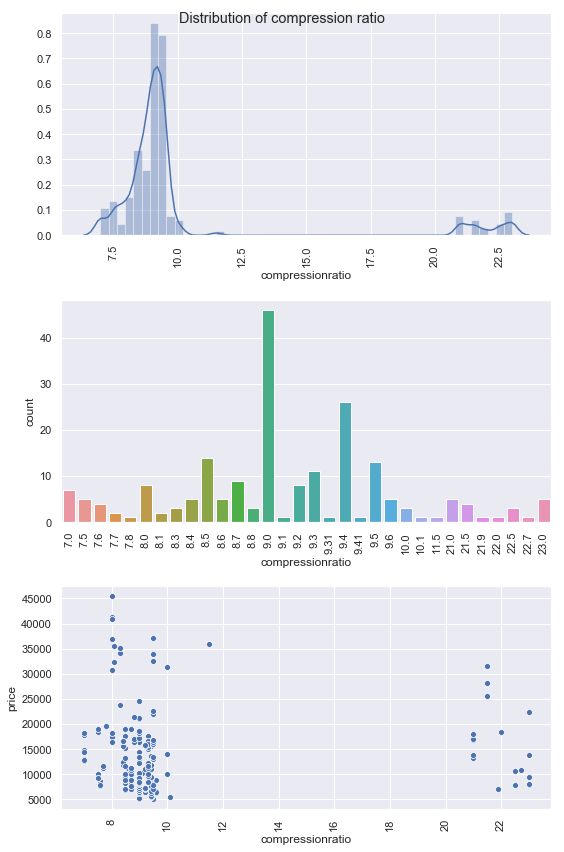

In [498]:
plt.figure(figsize = (8,12))
plt.suptitle('Distribution of compression ratio')
plt.subplot(3,1,1)
sns.distplot(prices.compressionratio)
plt.xticks(rotation = 'vertical')
plt.subplot(3,1,2)
sns.countplot(x = 'compressionratio',data = prices)
plt.xticks(rotation = 'vertical')
plt.subplot(3,1,3)
sns.scatterplot(x = 'compressionratio',y= 'price',data = prices)
plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.show()

For compression ratio we can see that there are two clusters formed around 10 and 20. Also there is no noticable trend between price and the compressionratio inside the clusters, hence we can convert the compressionratio into categorical variable. Assign low to all the values which are around 10 and high to variables which are around 20

In [499]:
prices.loc[prices.compressionratio < 20, 'CR'] = 'low'
prices.loc[prices.compressionratio >= 20, 'CR'] = 'high'

In [500]:
prices.CR = prices.CR.astype('category')

In [501]:
prices.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,CR
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,low
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,low
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,low
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,low
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,low


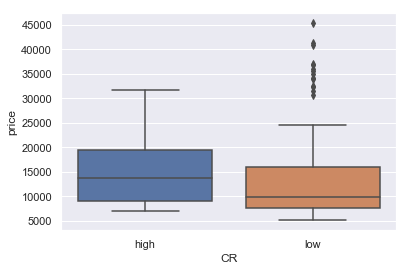

In [502]:
sns.boxplot(x = 'CR',y = 'price',data = prices)
plt.show()

we can see cars with higher comperssionratio have higher median price.

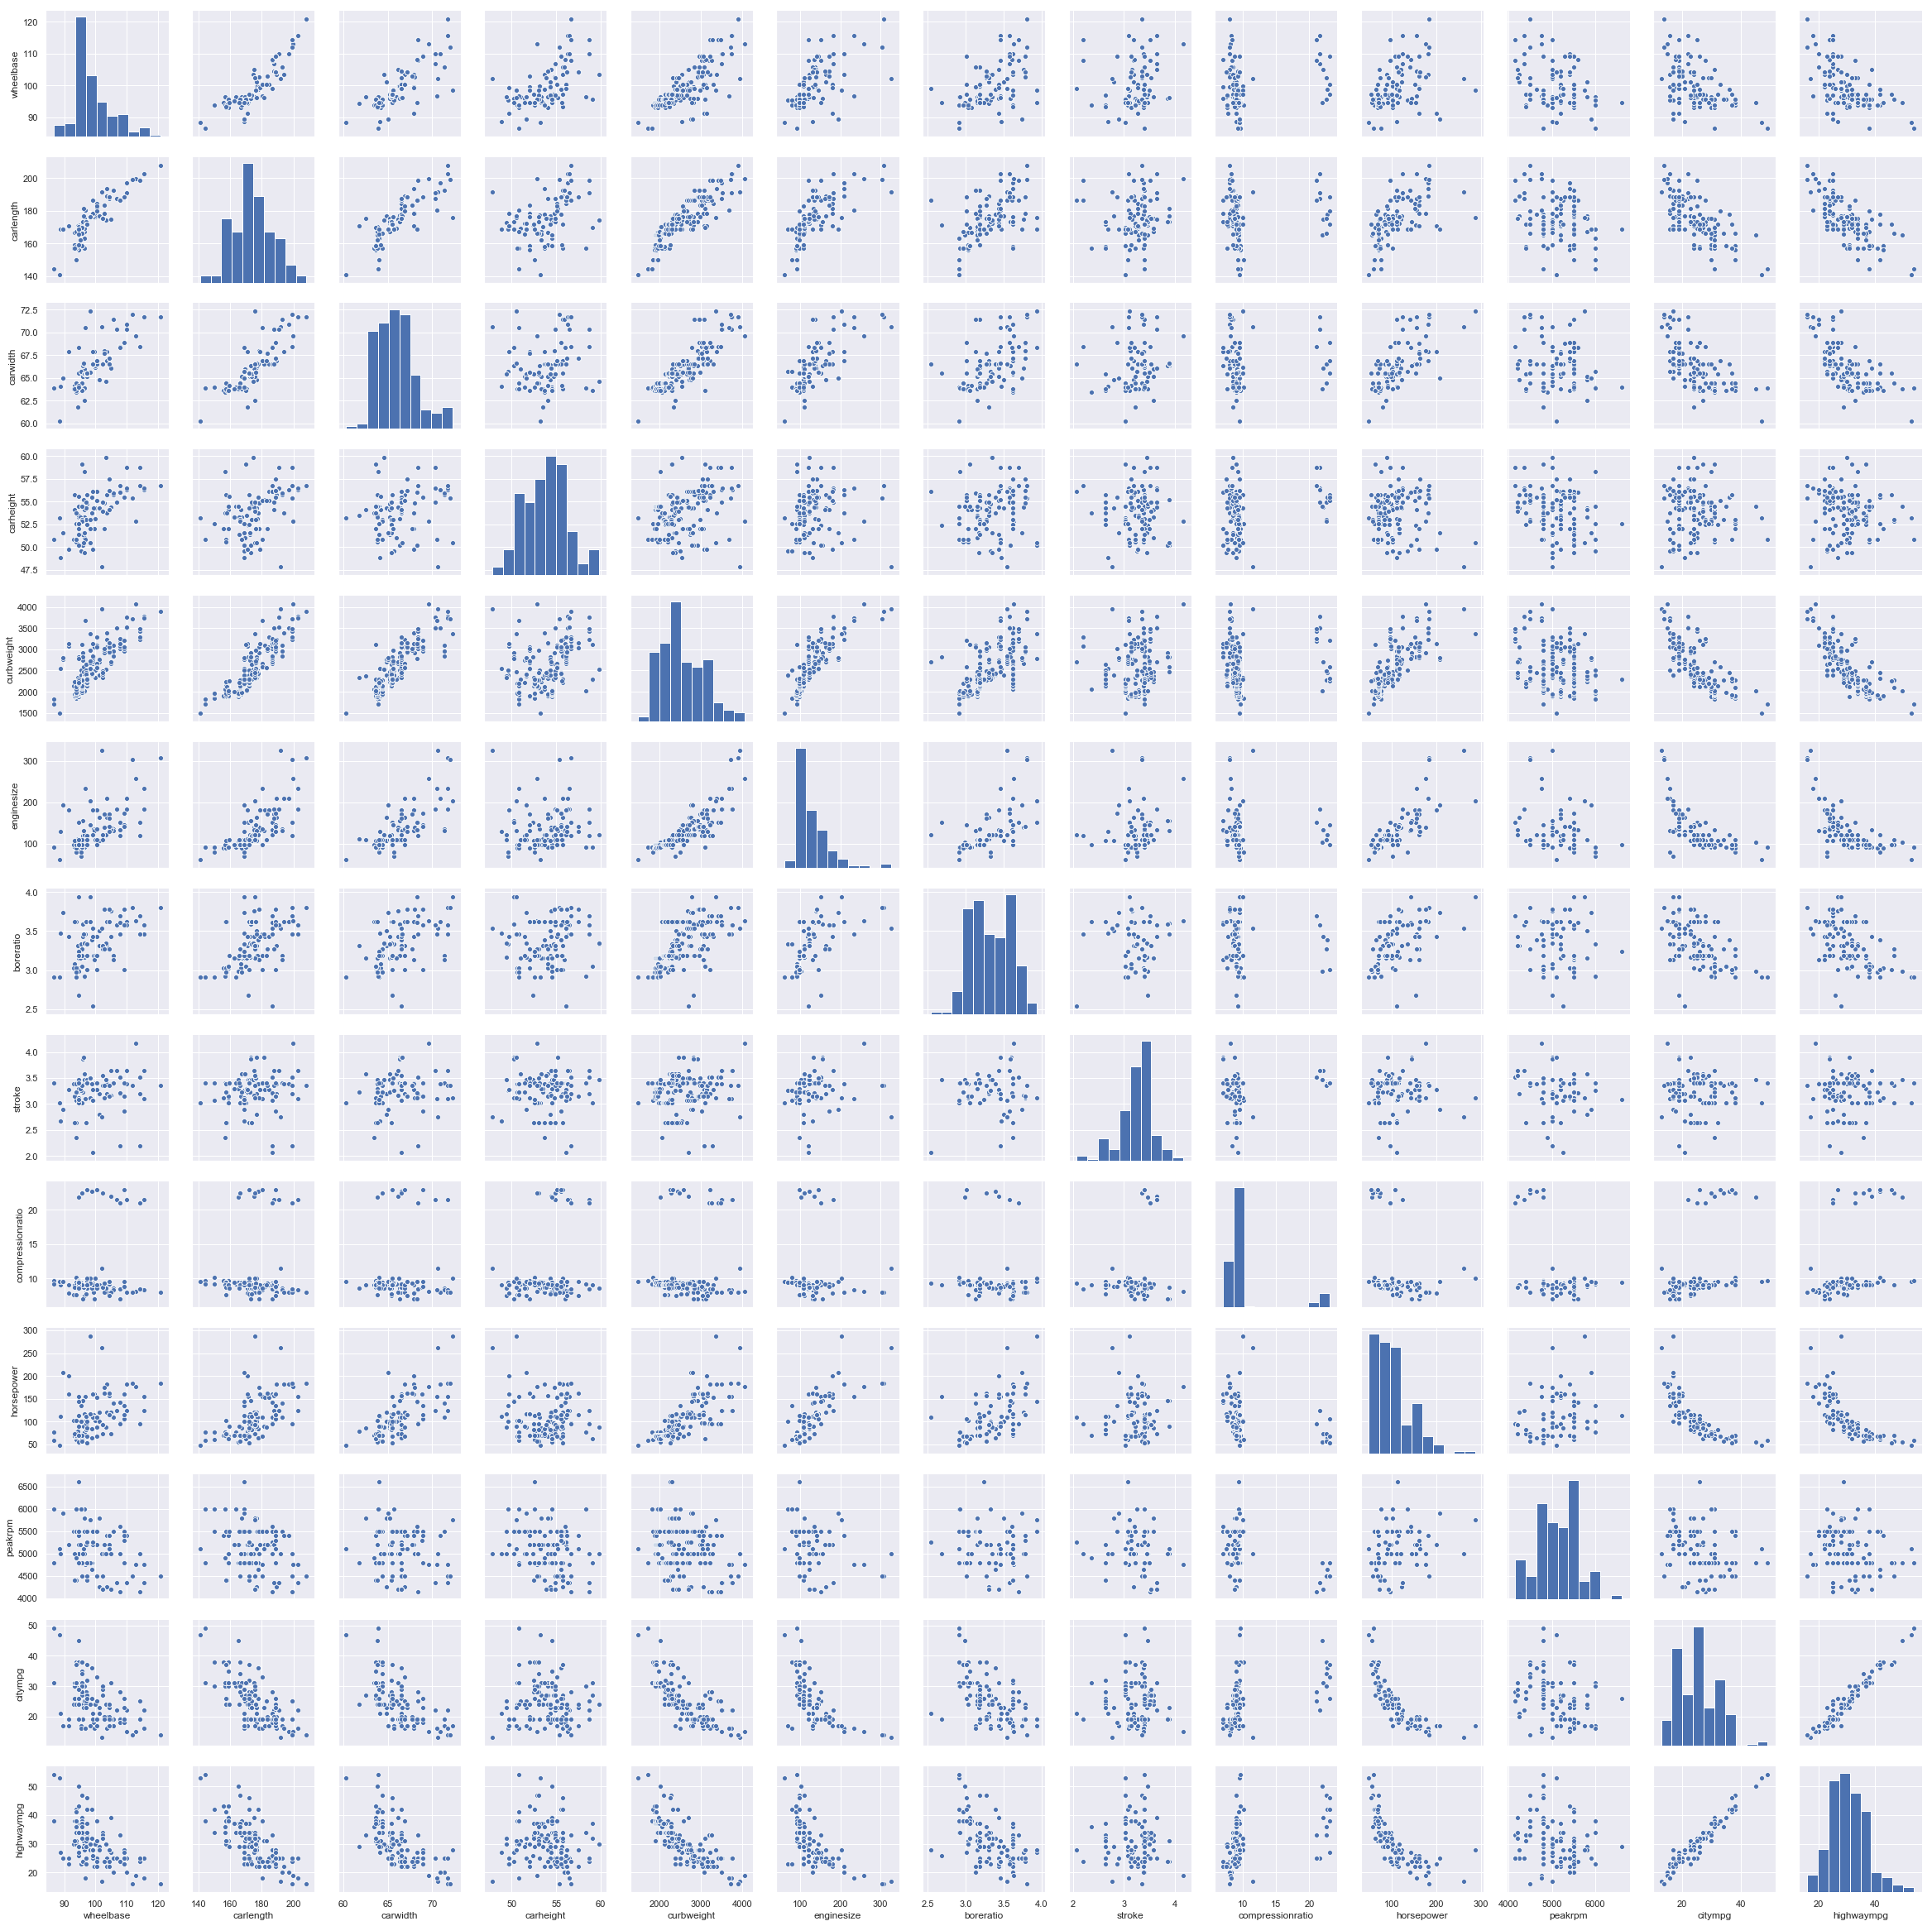

In [503]:
# Plots showing scatter plots for all possible pairs of continuous variables
sns.pairplot(prices[cont_cols])
plt.show()

We can spot a lot of correlated variables, we will consider all of them for now and remove one by one after checking VFI.

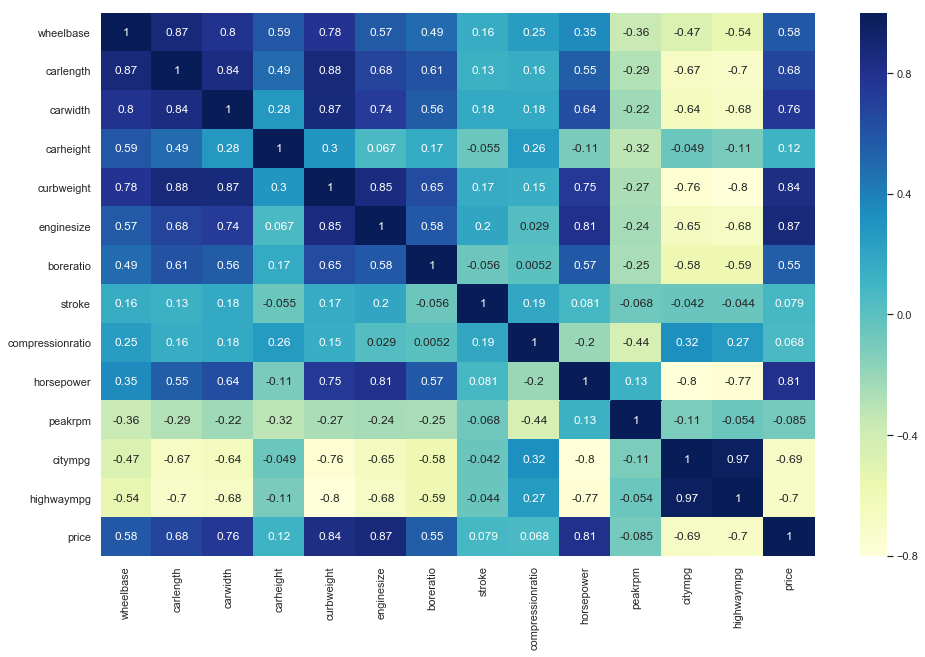

In [504]:
plt.figure(figsize = (16, 10))
sns.heatmap(prices.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see that the certain features like enginelocation,drivewheel,cylindernumber,symboling have high correlation with the prices

we can see that company of car has a correlation with the prices of the car.

In [505]:
prices_df = prices.copy()

# Data Preparation

## Creating dummies for categorical variables

In [506]:
prices[cat_cols].describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company
count,205,205,205,205,205,205,205,205,205,205,205
unique,6,2,2,2,5,3,2,7,7,8,22
top,0,gas,std,four,sedan,fwd,front,ohc,four,mpfi,toyota
freq,67,185,168,115,96,120,202,148,159,94,32


In [507]:
symboling_dummies = pd.get_dummies(prices.symboling,prefix = 'sym',drop_first = True)
fueltype_dummies = pd.get_dummies(prices.fueltype,prefix = 'ft',drop_first = True)
aspiration_dummies = pd.get_dummies(prices.aspiration,prefix = 'asp',drop_first = True)
doornumber_dummies = pd.get_dummies(prices.doornumber,prefix = 'dn',drop_first = True)
carbody_dummies = pd.get_dummies(prices.carbody,prefix = 'cb',drop_first = True)
drivewheel_dummies = pd.get_dummies(prices.drivewheel,prefix = 'dw',drop_first = True)
enginelocation_dummies = pd.get_dummies(prices.enginelocation,prefix = 'el',drop_first = True)
enginetype_dummies = pd.get_dummies(prices.enginetype,prefix = 'et',drop_first = True)
cylindernumber_dummies = pd.get_dummies(prices.cylindernumber,prefix = 'cn',drop_first = True)
fuelsystem_dummies = pd.get_dummies(prices.fuelsystem,prefix = 'fs',drop_first = True)
Company_dummies = pd.get_dummies(prices.Company,prefix = 'company',drop_first = True)
CR_dummies = pd.get_dummies(prices.CR,prefix = 'CR',drop_first = True)

In [508]:
prices = pd.concat([prices,symboling_dummies,fueltype_dummies,aspiration_dummies,doornumber_dummies,carbody_dummies,drivewheel_dummies,enginelocation_dummies,enginetype_dummies,cylindernumber_dummies,fuelsystem_dummies,Company_dummies,CR_dummies],axis = 1)

In [509]:
prices.drop(cat_cols,axis=1,inplace = True)

In [510]:
prices.drop(['compressionratio','CR'],axis = 1,inplace = True)

In [511]:
prices.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price,sym_-1,sym_0,sym_1,sym_2,sym_3,ft_gas,asp_turbo,dn_two,cb_hardtop,cb_hatchback,cb_sedan,cb_wagon,dw_fwd,dw_rwd,el_rear,et_dohcv,et_l,et_ohc,et_ohcf,et_ohcv,et_rotor,cn_five,cn_four,cn_six,cn_three,cn_twelve,cn_two,fs_2bbl,fs_4bbl,fs_idi,fs_mfi,fs_mpfi,fs_spdi,fs_spfi,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,CR_low
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,5000,21,27,13495.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,5000,21,27,16500.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154,5000,19,26,16500.0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,102,5500,24,30,13950.0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,115,5500,18,22,17450.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Splitting into train and test sets

In [512]:
from sklearn.model_selection import train_test_split

In [513]:
prices_train,prices_test = train_test_split(prices,test_size = 0.3,random_state = 8)

In [514]:
print(prices_train.shape)
print(prices_test.shape)

(143, 69)
(62, 69)


## Standardization of continous values

All contionous values are scalled using MinMaxscaler from SKlearn.

In [515]:
from sklearn.preprocessing import MinMaxScaler

In [516]:
minmax_scaler = MinMaxScaler()

In [517]:
prices.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price,sym_-1,sym_0,sym_1,sym_2,sym_3,ft_gas,asp_turbo,dn_two,cb_hardtop,cb_hatchback,cb_sedan,cb_wagon,dw_fwd,dw_rwd,el_rear,et_dohcv,et_l,et_ohc,et_ohcf,et_ohcv,et_rotor,cn_five,cn_four,cn_six,cn_three,cn_twelve,cn_two,fs_2bbl,fs_4bbl,fs_idi,fs_mfi,fs_mpfi,fs_spdi,fs_spfi,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,CR_low
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,5000,21,27,13495.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,5000,21,27,16500.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154,5000,19,26,16500.0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,102,5500,24,30,13950.0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,115,5500,18,22,17450.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [518]:
cont_cols.append('price')

In [519]:
cont_cols.pop(cont_cols.index('compressionratio'))

'compressionratio'

In [520]:
cont_cols

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [521]:
prices_train[cont_cols] = minmax_scaler.fit_transform(prices_train[cont_cols])

In [522]:
prices_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price,sym_-1,sym_0,sym_1,sym_2,sym_3,ft_gas,asp_turbo,dn_two,cb_hardtop,cb_hatchback,cb_sedan,cb_wagon,dw_fwd,dw_rwd,el_rear,et_dohcv,et_l,et_ohc,et_ohcf,et_ohcv,et_rotor,cn_five,cn_four,cn_six,cn_three,cn_twelve,cn_two,fs_2bbl,fs_4bbl,fs_idi,fs_mfi,fs_mpfi,fs_spdi,fs_spfi,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,CR_low
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
152,0.265306,0.262687,0.275000,0.558333,0.214119,0.116981,0.364286,0.457143,0.058333,0.351351,0.529412,0.594595,0.030286,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
11,0.425656,0.532836,0.375000,0.541667,0.351823,0.177358,0.685714,0.347619,0.220833,0.891892,0.294118,0.351351,0.280820,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.275000,0.675676,0.294118,0.324324,0.291123,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
104,0.402332,0.649254,0.516667,0.608333,0.609775,0.452830,0.635714,0.571429,0.433333,0.567568,0.176471,0.243243,0.208058,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
161,0.265306,0.376119,0.341667,0.433333,0.235066,0.139623,0.464286,0.457143,0.091667,0.351351,0.735294,0.837838,0.065041,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [523]:
prices_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price,sym_-1,sym_0,sym_1,sym_2,sym_3,ft_gas,asp_turbo,dn_two,cb_hardtop,cb_hatchback,cb_sedan,cb_wagon,dw_fwd,dw_rwd,el_rear,et_dohcv,et_l,et_ohc,et_ohcf,et_ohcv,et_rotor,cn_five,cn_four,cn_six,cn_three,cn_twelve,cn_two,fs_2bbl,fs_4bbl,fs_idi,fs_mfi,fs_mpfi,fs_spdi,fs_spfi,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo,CR_low
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.361720,0.503695,0.479720,0.506119,0.427284,0.259454,0.569281,0.569913,0.241084,0.527689,0.352118,0.396333,0.212697,0.090909,0.349650,0.258741,0.167832,0.118881,0.916084,0.153846,0.440559,0.048951,0.349650,0.461538,0.125874,0.580420,0.384615,0.013986,0.006993,0.062937,0.727273,0.055944,0.083916,0.020979,0.055944,0.755245,0.118881,0.006993,0.006993,0.020979,0.342657,0.013986,0.083916,0.006993,0.454545,0.027972,0.006993,0.034965,0.041958,0.041958,0.020979,0.034965,0.069930,0.020979,0.020979,0.090909,0.006993,0.055944,0.090909,0.055944,0.041958,0.027972,0.013986,0.034965,0.041958,0.139860,0.048951,0.055944,0.916084
std,0.175182,0.188377,0.187335,0.203906,0.209253,0.172178,0.199478,0.148386,0.179217,0.246308,0.195997,0.189649,0.210001,0.288490,0.478536,0.439483,0.375031,0.324786,0.278236,0.362069,0.498199,0.216524,0.478536,0.500271,0.332873,0.495225,0.488214,0.117845,0.083624,0.243703,0.446927,0.230621,0.278236,0.143818,0.230621,0.431453,0.324786,0.083624,0.083624,0.143818,0.476266,0.117845,0.278236,0.083624,0.499680,0.165472,0.083624,0.184337,0.201198,0.201198,0.143818,0.184337,0.255926,0.143818,0.143818,0.288490,0.083624,0.230621,0.288490,0.230621,0.201198,0.165472,0.117845,0.184337,0.201198,0.348061,0.216524,0.230621,0.278236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230321,0.391045,0.325000,0.350000,0.268425,0.135849,0.435714,0.495238,0.091667,0.351351,0.176471,0.243243,0.065501,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.309038,0.48

# Modelling

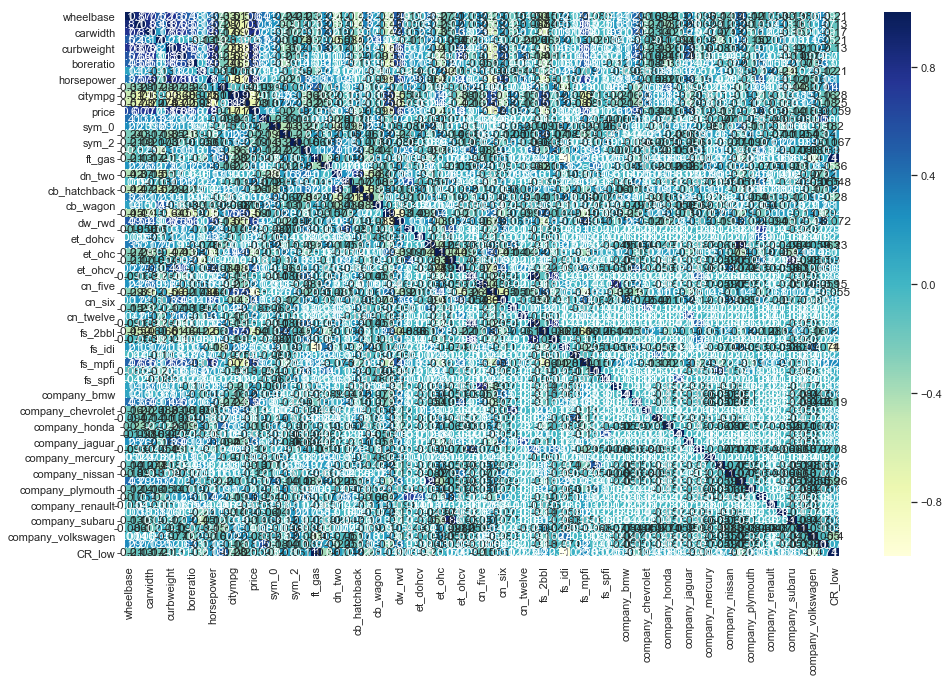

In [524]:
plt.figure(figsize = (16, 10))
sns.heatmap(prices_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see that horsepower is highly correlated variable with the price and also it is a variable that is generally looked at for assesing the performance of car, therefore it is a good place to start modelling.

## Dividing into Feature and Output sets

In [525]:
y_train = prices_train.pop('price')
X_train = prices_train

## Model1 : horsepower

In [526]:
import statsmodels.api as sm

In [ ]:
X_train_lm1 = sm.add_constant(X_train['horsepower'])

In [ ]:
lr1 = sm.OLS(y_train,X_train_lm1).fit()

In [ ]:
lr1.params

const        -0.017802
horsepower    0.956096
dtype: float64

The positive coefficeint here for horsepower makes sense because as engine size increases the power also increases, which makes the car tobe priced higher

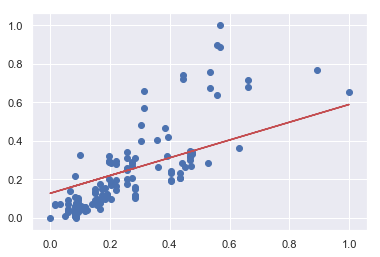

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm1.iloc[:, 1], y_train)
plt.plot(X_train_lm1.iloc[:, 1], 0.127 + 0.462*X_train_lm1.iloc[:, 1], 'r')
plt.show()

In [ ]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     280.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.29e-35
Time:                        22:44:12   Log-Likelihood:                 99.122
No. Observations:                 143   AIC:                            -194.2
Df Residuals:                     141   BIC:                            -188.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0178      0.017     -1.040      0.3

From model statistics we can see that a linear model on with horsepower has an R2 of 0.666 and adj.R2 of 0.663 and the coefficeints are also significant.

We can see that all other correalted variables with prices are highly correlated with each other. Lets see we can achieve a better model taking all the variables

## Model2: All features

In [ ]:
X_train_lm2 = sm.add_constant(X_train)
lr2 = sm.OLS(y_train,X_train_lm2).fit()

In [ ]:
print(lr2.params)

const                -0.013658
wheelbase             0.240714
carlength            -0.251933
carwidth              0.271116
carheight            -0.107960
curbweight            0.314752
enginesize            0.525756
boreratio            -0.166487
stroke                0.043934
horsepower            0.250482
peakrpm               0.075618
citympg               0.000083
highwaympg            0.020393
sym_-1               -0.034797
sym_0                -0.035018
sym_1                -0.032083
sym_2                -0.057205
sym_3                -0.069381
ft_gas               -0.055990
asp_turbo             0.025087
dn_two                0.020835
cb_hardtop           -0.064994
cb_hatchback         -0.101388
cb_sedan             -0.071345
cb_wagon             -0.047698
dw_fwd                0.021772
dw_rwd                0.025854
el_rear               0.138543
et_dohcv             -0.271943
et_l                  0.044799
                        ...   
cn_two                0.057460
fs_2bbl 

In [ ]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     42.26
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.80e-42
Time:                        22:44:12   Log-Likelihood:                 274.36
No. Observations:                 143   AIC:                            -420.7
Df Residuals:                      79   BIC:                            -231.1
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0137      0

We can see that R2 of the model is pretty high, it about 97% and adjusted R2 of about 95%. But the F-statistic is pretty low and also the p-value of the majority of ceofficients are far greater than general rule of 5%. Hence these can be considered as significant for drawing conclusions.

Let us check what are the VIF values to see what are strongly dependent variables

### VIF CHECK

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train.columns
vif_df['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
67,CR_low,inf
17,ft_gas,inf
63,company_subaru,inf
58,company_peugeot,inf
38,cn_two,inf
36,cn_three,inf
32,et_rotor,inf
30,et_ohcf,inf
28,et_l,inf
26,el_rear,inf


We can see very high multi collinearity and only 3 features have VIF near 5 out of 68

Lets try another model now by using RFE, by selecting top 10 features

## Model3: RFE (Top 30)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [ ]:
lr_rfe30 = LinearRegression()
lr_rfe30.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
rfe30 = RFE(lr_rfe30,30)

In [ ]:
rfe30 = rfe30.fit(X_train,y_train)

In [ ]:
X_train.columns[rfe30.support_]

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'ft_gas', 'cb_hardtop',
       'cb_hatchback', 'cb_sedan', 'cb_wagon', 'el_rear', 'et_dohcv',
       'et_ohcf', 'et_rotor', 'cn_six', 'cn_three', 'cn_twelve', 'cn_two',
       'fs_2bbl', 'fs_spfi', 'company_bmw', 'company_buick', 'company_jaguar',
       'company_mitsubishi', 'company_porsche', 'company_saab',
       'company_volvo'],
      dtype='object')

In [ ]:
col30 = X_train.columns[rfe30.support_]

In [ ]:
X_train_lm3 = sm.add_constant(X_train[col30])
lr3 = sm.OLS(y_train,X_train_lm3).fit()

In [ ]:
print(lr3.params)

const                 0.033577
wheelbase             0.122558
carlength            -0.141715
carwidth              0.286997
carheight            -0.036237
curbweight            0.184342
enginesize            0.508108
boreratio            -0.214558
horsepower            0.373073
ft_gas               -0.055270
cb_hardtop           -0.063007
cb_hatchback         -0.098433
cb_sedan             -0.072343
cb_wagon             -0.073482
el_rear               0.170690
et_dohcv             -0.228539
et_ohcf               0.059662
et_rotor              0.073055
cn_six               -0.096243
cn_three              0.144136
cn_twelve            -0.330096
cn_two                0.073055
fs_2bbl               0.043389
fs_spfi               0.064864
company_bmw           0.293709
company_buick         0.107860
company_jaguar        0.132883
company_mitsubishi   -0.048083
company_porsche       0.188233
company_saab          0.089368
company_volvo         0.073294
dtype: float64


In [ ]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     100.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.01e-67
Time:                        22:44:12   Log-Likelihood:                 256.11
No. Observations:                 143   AIC:                            -452.2
Df Residuals:                     113   BIC:                            -363.3
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0336      0

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train[col30].columns
vif_df['VIF'] = [variance_inflation_factor(X_train[col30].values, i) for i in range(X_train[col30].shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
20,cn_two,inf
16,et_rotor,inf
1,carlength,135.15
4,curbweight,98.34
2,carwidth,70.12
5,enginesize,59.73
6,boreratio,43.54
0,wheelbase,43.10
7,horsepower,35.03
3,carheight,29.76


lets drop the features which have high p-value (which are not significant). Hence `carheight` is droppped.

In [ ]:
col30 = col30.tolist()

In [ ]:
col30.remove('carwidth')

In [ ]:
X_train_lm4 = sm.add_constant(X_train[col30])
lr4 = sm.OLS(y_train,X_train_lm4).fit()

In [ ]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     88.78
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.05e-64
Time:                        22:44:13   Log-Likelihood:                 244.34
No. Observations:                 143   AIC:                            -430.7
Df Residuals:                     114   BIC:                            -344.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0915      0

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train[col30].columns
vif_df['VIF'] = [variance_inflation_factor(X_train[col30].values, i) for i in range(X_train[col30].shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
19,cn_two,inf
15,et_rotor,inf
1,carlength,109.60
3,curbweight,94.48
4,enginesize,59.72
0,wheelbase,42.70
5,boreratio,42.66
6,horsepower,34.97
2,carheight,29.71
10,cb_sedan,19.82


### Dropping `carlength`

In [ ]:
col30.remove('carlength')

X_train_lm5 = sm.add_constant(X_train[col30])
lr5 = sm.OLS(y_train,X_train_lm5).fit()

print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     92.81
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.11e-65
Time:                        22:44:13   Log-Likelihood:                 244.30
No. Observations:                 143   AIC:                            -432.6
Df Residuals:                     115   BIC:                            -349.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0920      0

### Dropping `fs_spfi`

In [ ]:
col30.remove('fs_spfi')

X_train_lm6 = sm.add_constant(X_train[col30])
lr6 = sm.OLS(y_train,X_train_lm6).fit()

print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     96.67
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.52e-66
Time:                        22:44:13   Log-Likelihood:                 243.91
No. Observations:                 143   AIC:                            -433.8
Df Residuals:                     116   BIC:                            -353.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0859      0

### Dropping `el_rear`

In [ ]:
col30.remove('el_rear')

X_train_lm7 = sm.add_constant(X_train[col30])
lr7 = sm.OLS(y_train,X_train_lm7).fit()

print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     99.69
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.83e-67
Time:                        22:44:13   Log-Likelihood:                 242.75
No. Observations:                 143   AIC:                            -433.5
Df Residuals:                     117   BIC:                            -356.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0970      0

### Dropping `carheight`

In [ ]:

col30.remove('carheight')

X_train_lm8 = sm.add_constant(X_train[col30])
lr8 = sm.OLS(y_train,X_train_lm8).fit()

print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.04e-68
Time:                        22:44:13   Log-Likelihood:                 241.80
No. Observations:                 143   AIC:                            -433.6
Df Residuals:                     118   BIC:                            -359.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0801      0

### Dropping  `cb_hardtop`

In [ ]:
col30.remove('cb_hardtop')

X_train_lm9 = sm.add_constant(X_train[col30])
lr9 = sm.OLS(y_train,X_train_lm9).fit()

print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     106.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.18e-68
Time:                        22:44:13   Log-Likelihood:                 240.53
No. Observations:                 143   AIC:                            -433.1
Df Residuals:                     119   BIC:                            -361.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0243      0

### Dropping `cb_sedan`

In [ ]:
col30.remove('cb_sedan')

X_train_lm10 = sm.add_constant(X_train[col30])
lr10 = sm.OLS(y_train,X_train_lm10).fit()

print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     110.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.63e-69
Time:                        22:44:13   Log-Likelihood:                 239.10
No. Observations:                 143   AIC:                            -432.2
Df Residuals:                     120   BIC:                            -364.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0063      0

### Dropping `cb_wagon`

In [ ]:

col30.remove('cb_wagon')

X_train_lm11 = sm.add_constant(X_train[col30])
lr11 = sm.OLS(y_train,X_train_lm11).fit()

print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     113.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.72e-69
Time:                        22:44:13   Log-Likelihood:                 237.31
No. Observations:                 143   AIC:                            -430.6
Df Residuals:                     121   BIC:                            -365.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0024      0

### Dropping `cb_hatchback`

In [ ]:
col30.remove('cb_hatchback')

X_train_lm12 = sm.add_constant(X_train[col30])
lr12 = sm.OLS(y_train,X_train_lm12).fit()

print(lr12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     117.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.96e-70
Time:                        22:44:13   Log-Likelihood:                 236.08
No. Observations:                 143   AIC:                            -430.2
Df Residuals:                     122   BIC:                            -367.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0063      0

### Dropping `fs_2bbl`

In [ ]:

col30.remove('fs_2bbl')

X_train_lm13 = sm.add_constant(X_train[col30])
lr13 = sm.OLS(y_train,X_train_lm13).fit()

print(lr13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     121.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.67e-70
Time:                        22:44:13   Log-Likelihood:                 234.35
No. Observations:                 143   AIC:                            -428.7
Df Residuals:                     123   BIC:                            -369.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0026      0

### Dropping `company_mitsubishi`

In [ ]:
col30.remove('company_mitsubishi')

X_train_lm14 = sm.add_constant(X_train[col30])
lr14 = sm.OLS(y_train,X_train_lm14).fit()

print(lr14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     126.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.27e-70
Time:                        22:44:13   Log-Likelihood:                 232.37
No. Observations:                 143   AIC:                            -426.7
Df Residuals:                     124   BIC:                            -370.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0003      0.025     

All features are significant, check for VIF.

### VIF CHECK

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train[col30].columns
vif_df['VIF'] = [variance_inflation_factor(X_train[col30].values, i) for i in range(X_train[col30].shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
8,et_rotor,inf
12,cn_two,inf
2,enginesize,55.73
1,curbweight,53.64
3,boreratio,33.60
4,horsepower,24.14
0,wheelbase,21.38
5,ft_gas,6.72
9,cn_six,4.36
14,company_buick,3.83


### Dropping `et_rotor`

In [ ]:
col30.remove('et_rotor')

X_train_lm15 = sm.add_constant(X_train[col30])
lr15 = sm.OLS(y_train,X_train_lm15).fit()

print(lr15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     126.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.27e-70
Time:                        22:44:13   Log-Likelihood:                 232.37
No. Observations:                 143   AIC:                            -426.7
Df Residuals:                     124   BIC:                            -370.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0003      0.025     

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train[col30].columns
vif_df['VIF'] = [variance_inflation_factor(X_train[col30].values, i) for i in range(X_train[col30].shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
2,enginesize,55.73
1,curbweight,53.64
3,boreratio,33.60
4,horsepower,24.14
0,wheelbase,21.38
5,ft_gas,6.72
8,cn_six,4.36
13,company_buick,3.83
10,cn_twelve,2.47
14,company_jaguar,2.34


### Dropping `enginesize`

In [ ]:
col30.remove('enginesize')

X_train_lm16 = sm.add_constant(X_train[col30])
lr16 = sm.OLS(y_train,X_train_lm16).fit()

print(lr16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     109.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.64e-66
Time:                        22:44:14   Log-Likelihood:                 218.62
No. Observations:                 143   AIC:                            -401.2
Df Residuals:                     125   BIC:                            -347.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0030      0.028     

After removing `cn_six` there are some features which have become insignificant. Hence those are to be removed

### Dropping `cn_six`

In [ ]:
col30.remove('cn_six')

X_train_lm17 = sm.add_constant(X_train[col30])
lr17 = sm.OLS(y_train,X_train_lm17).fit()

print(lr17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     116.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.45e-67
Time:                        22:44:14   Log-Likelihood:                 218.05
No. Observations:                 143   AIC:                            -402.1
Df Residuals:                     126   BIC:                            -351.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0071      0.027     

### Dropping `cn_twelve`

In [ ]:
col30.remove('cn_twelve')

X_train_lm18 = sm.add_constant(X_train[col30])
lr18 = sm.OLS(y_train,X_train_lm18).fit()

print(lr18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.32e-68
Time:                        22:44:14   Log-Likelihood:                 217.56
No. Observations:                 143   AIC:                            -403.1
Df Residuals:                     127   BIC:                            -355.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0116      0.027     

### Dropping `cn_three`

In [ ]:
col30.remove('cn_three')

X_train_lm19 = sm.add_constant(X_train[col30])
lr19 = sm.OLS(y_train,X_train_lm19).fit()

print(lr19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     132.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.34e-69
Time:                        22:44:14   Log-Likelihood:                 216.64
No. Observations:                 143   AIC:                            -403.3
Df Residuals:                     128   BIC:                            -358.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0072      0.027     

### Dropping `cn_two`

In [ ]:
col30.remove('cn_two')

X_train_lm20 = sm.add_constant(X_train[col30])
lr20 = sm.OLS(y_train,X_train_lm20).fit()

print(lr20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     141.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.28e-69
Time:                        22:44:14   Log-Likelihood:                 215.63
No. Observations:                 143   AIC:                            -403.3
Df Residuals:                     129   BIC:                            -361.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0059      0.027     

### Dropping `et_ohcf`

In [ ]:
col30.remove('et_ohcf')

X_train_lm21 = sm.add_constant(X_train[col30])
lr21 = sm.OLS(y_train,X_train_lm21).fit()

print(lr21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     152.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.75e-70
Time:                        22:44:14   Log-Likelihood:                 214.52
No. Observations:                 143   AIC:                            -403.0
Df Residuals:                     130   BIC:                            -364.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0098      0.027     

### Dropping `company_saab`

In [ ]:
col30.remove('company_saab')

X_train_lm22 = sm.add_constant(X_train[col30])
lr22 = sm.OLS(y_train,X_train_lm22).fit()

print(lr22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     164.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.77e-71
Time:                        22:44:14   Log-Likelihood:                 213.61
No. Observations:                 143   AIC:                            -403.2
Df Residuals:                     131   BIC:                            -367.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0101      0.027     

### Dropping `company_volvo`

In [ ]:
col30.remove('company_volvo')

X_train_lm23 = sm.add_constant(X_train[col30])
lr23 = sm.OLS(y_train,X_train_lm23).fit()

print(lr23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     179.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.62e-72
Time:                        22:44:14   Log-Likelihood:                 212.60
No. Observations:                 143   AIC:                            -403.2
Df Residuals:                     132   BIC:                            -370.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0201      0.026     

### Dropping `ft_gas`

In [ ]:
col30.remove('ft_gas')

X_train_lm23 = sm.add_constant(X_train[col30])
lr23 = sm.OLS(y_train,X_train_lm23).fit()

print(lr23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     195.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.67e-72
Time:                        22:44:14   Log-Likelihood:                 210.63
No. Observations:                 143   AIC:                            -401.3
Df Residuals:                     133   BIC:                            -371.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0593      0.016     

### Checking VIF

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train[col30].columns
vif_df['VIF'] = [variance_inflation_factor(X_train[col30].values, i) for i in range(X_train[col30].shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
1,curbweight,44.01
0,wheelbase,18.47
3,horsepower,13.28
2,boreratio,12.99
8,company_porsche,1.87
4,et_dohcv,1.45
6,company_buick,1.38
7,company_jaguar,1.34
5,company_bmw,1.11


### Dropping `curbweight`

In [ ]:
col30.remove('curbweight')

X_train_lm24 = sm.add_constant(X_train[col30])
lr24 = sm.OLS(y_train,X_train_lm24).fit()

print(lr24.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     197.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.03e-70
Time:                        22:44:14   Log-Likelihood:                 202.98
No. Observations:                 143   AIC:                            -388.0
Df Residuals:                     134   BIC:                            -361.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0546      0.017     

### Dropping `boreratio`

In [ ]:
col30.remove('boreratio')

X_train_lm25 = sm.add_constant(X_train[col30])
lr25 = sm.OLS(y_train,X_train_lm25).fit()

print(lr25.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     224.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.86e-71
Time:                        22:44:14   Log-Likelihood:                 202.24
No. Observations:                 143   AIC:                            -388.5
Df Residuals:                     135   BIC:                            -364.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0663      0.014     

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train[col30].columns
vif_df['VIF'] = [variance_inflation_factor(X_train[col30].values, i) for i in range(X_train[col30].shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
1,horsepower,5.04
0,wheelbase,4.02
6,company_porsche,1.73
2,et_dohcv,1.37
4,company_buick,1.19
5,company_jaguar,1.18
3,company_bmw,1.10


In [ ]:
prices_test[cont_cols] = minmax_scaler.transform(prices_test[cont_cols])

In [ ]:
prices_test.head()

## Residual Analysis of the train data

In [ ]:
y_train_pred = lr25.predict(X_train_lm25)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
y_train_pred = lr25.predict(X_train_lm25)

# Plot the histogram of the error terms
fig = plt.figure()
sns.scatterplot(y_train,(y_train - y_train_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

We can see that error terms are distributed normally with mean zero and also erros terms are randomly spread across price range.

### Evaluating model on test set

In [ ]:
y_test = prices_test.pop('price')
X_test = prices_test

In [ ]:
X_test_lm1 = sm.add_constant(X_test[col30])

In [ ]:
y_test_pred = lr25.predict(X_test_lm1)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

R2 on the test set is 0.83, it is a pretty good model.

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

In [ ]:
fig = plt.figure() 
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)

### Model Summary:   

1. The linear model for price has 7 features
2. The R2 and the adjusted R2 for the model is 0.921 and 0.917 respectively.
3. The R2 on the test set is 0.83
4. Error terms are normally distributed with mean zero
5. There is no observed pattern in the error terms when plotted against the predicted values

## Linear equation and Business Insights

$price = 0.2795 \times wheelbase+0.5876 \times horsepower-0.2629 \times et\_dohcv+0.2239 \times company\_bmw+0.3701 \times company\_buick+0.2293 \times company\_jaguar+0.2979 \times company\_porsche. $

    - Horsepower has the highest factor and it is reasonable because higher horsepower cars are generally expensive.They tend to sports cars or they have large engines which are costiler.
    - Company of the car has a positive effect on the price of the car if it belongs to on of bmw,buick,jaguar or porsche
    - Car with higher wheelbase has a higher price

## Conclusion :

Linear model has been fitted for price of the car based on the given features. For building of the model, top 30 features were selected RFE (recursive feature elimination) and from there on each feature is eliminated checking p-value and VIF values until we have arrived at a satisfactory model. 

Horsepower has an VIF of 5.04, though it is slightly higher than 5, this was not removed because of its business importance. Higher horse means, larger engine and larger chasis and better aerodynamics for withstanding those higher acceleration and speeds. Therefore it makes a lot of sense of Horsepower to be there in the equation and be a major contributor for the price.